In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
path = 'C:/Users/mgika/Documents/lab/lab_2015_2021.xlsx'

In [3]:
df = pd.read_excel(path)

In [4]:
df.head()

,date,user_id,gender,age,diagnosis,sample,genes
0,2015-01-12,lab_000007,female,53.0,colon,ffpe,KRAS;NRAS;BRAF;MSI
1,2015-01-12,lab_000008,male,39.0,melanoma,ffpe,BRAF
2,2015-01-12,lab_000009,female,50.0,breast,ffpe,HER2_cnv
3,2015-01-12,lab_000010,male,75.0,colon,ffpe,KRAS;NRAS;BRAF
4,2015-01-12,lab_000011,male,65.0,lung,ffpe,EGFR


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58625 entries, 0 to 58624
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       58622 non-null  datetime64[ns]
 1   user_id    58623 non-null  object        
 2   gender     58623 non-null  object        
 3   age        56444 non-null  float64       
 4   diagnosis  58623 non-null  object        
 5   sample     58623 non-null  object        
 6   genes      58599 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 3.1+ MB


In [6]:
df['date'] = pd.to_datetime(df.date, format="%Y-%m-%d")

In [7]:
# remove the null genes and date values


df = df.loc[df.genes.notnull()]
df = df.loc[df.date.notnull()]

In [8]:
df['genes'] = df['genes'].apply(lambda x: x.split(';'))

In [9]:
df = df.explode('genes')

In [10]:
# look at the genes names


df.genes.unique()

array(['KRAS', 'NRAS', 'BRAF', 'MSI', 'HER2_cnv', 'EGFR', 'MDM2', 'ALK',
       'KIT', 'BRCA1/2', 'ROS1', 'MET_cnv', 'RET', 'SMS', 'EWSR',
       'FISH_mel', 'CDK4', 'PDGFRA', 'HER2_mut', 'EGFR1', 'PAX3/PAX7',
       'F2/F5', 'HPV', 'MET_mut', 'MYC', 'SS18', 'DDIT3', 'CCND1',
       'PIK3CA', 'FGFR', 'BCL2', 'BCL6', 'TOPO2A', '', 'MET', 'HER2neo',
       'ВRAF', 'NTRK', 'CHOP', 'DDiT3', 'NRG11', 'NRАS', 'FUS', 'PiK3CA',
       'Her2_mut', 'NRG1', 'TFE3', 'HRR', 'CPS'], dtype=object)

In [11]:
# make corrections in gene names


df['genes'] = df.genes.replace({'EGFR1': 'EGFR', 'DDiT3': 'DDIT3', 'PiK3CA': 'PIK3CA', 'HER2neo': 'HER2_cnv',
                                'Her2_mut': 'HER2_mut','NRG11': 'NRG1', 'MET': 'MET_cnv'})
df = df.loc[df.genes!='']

df.genes.unique()

array(['KRAS', 'NRAS', 'BRAF', 'MSI', 'HER2_cnv', 'EGFR', 'MDM2', 'ALK',
       'KIT', 'BRCA1/2', 'ROS1', 'MET_cnv', 'RET', 'SMS', 'EWSR',
       'FISH_mel', 'CDK4', 'PDGFRA', 'HER2_mut', 'PAX3/PAX7', 'F2/F5',
       'HPV', 'MET_mut', 'MYC', 'SS18', 'DDIT3', 'CCND1', 'PIK3CA',
       'FGFR', 'BCL2', 'BCL6', 'TOPO2A', 'ВRAF', 'NTRK', 'CHOP', 'NRG1',
       'NRАS', 'FUS', 'TFE3', 'HRR', 'CPS'], dtype=object)

In [12]:
# look at the diagnoses


df.diagnosis.unique()

array(['colon', 'melanoma', 'breast', 'lung', 'sarcoma', 'gastric',
       'GIST', 'unknown', 'ovarian', 'F2/F5screen', 'thyroid',
       'headandneck', 'cholangiocarcinoma', 'uvealmelanoma', 'lymphoma',
       'pancreatic', 'liver', 'salivarygland', 'multiple', 'uterine',
       'urothelial', 'brain', 'vaginal', 'endometrial', 'thymoma',
       'prostate', 'kidney', 'lacrimalgland', 'adrenal', 'glioblastoma',
       'skin'], dtype=object)

In [13]:
# make corrections in diagnoses names


df['diagnosis'] = df.diagnosis.replace({'F2/F5screen': 'F2/F5_screen', 'headandneck': 'head_and_neck',
                                        'uvealmelanoma': 'uveal_melanoma', 'salivary_gland': 'salivary_gland',
                                        'lacrimalgland': 'lacrimal_gland'})

df.diagnosis.unique()

array(['colon', 'melanoma', 'breast', 'lung', 'sarcoma', 'gastric',
       'GIST', 'unknown', 'ovarian', 'F2/F5_screen', 'thyroid',
       'head_and_neck', 'cholangiocarcinoma', 'uveal_melanoma',
       'lymphoma', 'pancreatic', 'liver', 'salivarygland', 'multiple',
       'uterine', 'urothelial', 'brain', 'vaginal', 'endometrial',
       'thymoma', 'prostate', 'kidney', 'lacrimal_gland', 'adrenal',
       'glioblastoma', 'skin'], dtype=object)

In [21]:
# a quick description of patients' age

df_age = df.query('gender!="unknown"')\
    .groupby(['age','gender'], as_index=False)\
    .agg({'user_id': 'nunique'})

df_age.age.describe()

count    158.000000
mean      57.050633
std       22.965163
min       18.000000
25%       37.250000
50%       57.000000
75%       76.750000
max       99.000000
Name: age, dtype: float64

<AxesSubplot:xlabel='age', ylabel='user_id'>

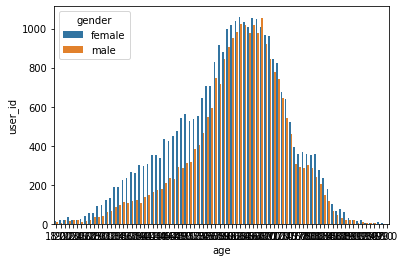

In [22]:
sns.barplot(x='age', y='user_id', hue='gender', data=df_age)

<AxesSubplot:xlabel='age'>

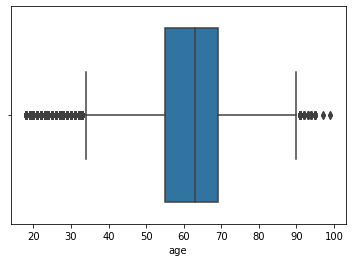

In [22]:
sns.boxplot(x = df.age)

<AxesSubplot:xlabel='user_id', ylabel='gender'>

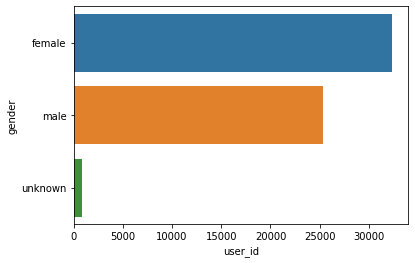

In [39]:
# gender distribution

df_gender = df.groupby('gender', as_index=False).nunique()
sns.barplot(x='user_id', y='gender', data=df_gender)

In [38]:
df.groupby(['diagnosis', 'gender'], as_index=False)\
    .agg({'user_id': 'nunique'})\
    .sort_values('user_id', ascending=False)

,diagnosis,gender,user_id
29,lung,male,10496
13,colon,female,9294
14,colon,male,9057
28,lung,female,7486
9,breast,female,7073
...,...,...,...
51,thymoma,female,1
43,prostate,female,1
24,kidney,male,1
38,multiple,male,1


<AxesSubplot:xlabel='user_id', ylabel='diagnosis'>

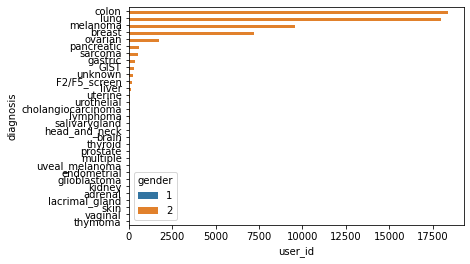

In [28]:
df_ds_top

sns.barplot(x='user_id', y='diagnosis', hue = 'gender', data = df_ds.)